# Etivity 1

## Student Name: Garret Molloy
## Student ID: 9021906

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Task 1

## 1.1 Load bank-et1.csv into a Pandas dataframe

In [2]:
df = pd.read_csv('bank_et1.csv')

## 1.2 Examine the first few data rows and the last few data rows. 

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


## 1.3 Identify an attribute that can be the target/dependable variable for 2-class classification.
Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below).

In [5]:
# Drop Unamed Column as it is just an ID 
del df['Unnamed: 0']

# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
df.count()

age             2000
job             1990
marital         2000
education       1896
default         2000
balance         2000
ratio_bal_ln    2000
ratio_ln_inc    2000
housing         2000
loan            2000
contact         1809
day             2000
month           2000
duration        2000
campaign        2000
pdays           2000
previous        2000
poutcome        1546
subscribed      2000
dtype: int64

So we have 2000 records. But some features have missing or blank entries.

In [7]:
df['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

In [8]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [9]:
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [10]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

## Ans 1.3: Identify Target

If __'default'__ means that this customer of the bank has defaulted on a loan, this could be a valuable 2-class classification that can be the target variable with values ('yes'/'no').

Other candidates may be:
__'subscribed'__  also a 2-class classifier ('yes'/'no') - presuming subscribed is something interesting for the bank and something we want them to do.

__'loan'__ and __'housing'__ are also 2 calss features, housing having good representation balso and loan 1750/250, not as much.

After EDA below, I found that there was too few records for the feature __default__ with only 15 = 'yse' out of 2000 client records, with this low population we would not have enough information to make a robust decision. 

Based on this I will choose __subscribed__
subscribed has a 50-50 distribution amongst the records, 1000 of each so we have plenty of data for both outcomes to train and test on.

# Task 2 - EDA

## 2.1 Calculate statistics for numerical and categorical attributes

In [11]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [12]:
# Print statistics for all categorical attributes
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

Print the statistics for the Categorical Features and the possible Values as well as missing Values (nulls or blanks = NaN)


In [13]:
def attribute_stats(list): 
    for x in list:
        records = df[x].count()
        blank_records = 2000 - records
        print("\n ==== " + x + " - " + str(records) + " records (" + str(blank_records) + " blank) ====")
        print(df[x].value_counts(normalize=True, dropna=False))
    
attribute_stats(["job","marital", "education", "default", "housing", "loan", "contact", "poutcome", "subscribed"])


 ==== job - 1990 records (10 blank) ====
management       0.2305
technician       0.1740
blue-collar      0.1490
admin.           0.1235
services         0.0825
retired          0.0810
student          0.0480
unemployed       0.0345
self-employed    0.0320
entrepreneur     0.0225
housemaid        0.0175
NaN              0.0050
Name: job, dtype: float64

 ==== marital - 2000 records (0 blank) ====
married     0.5555
single      0.3370
divorced    0.1075
Name: marital, dtype: float64

 ==== education - 1896 records (104 blank) ====
secondary    0.4975
tertiary     0.3420
primary      0.1085
NaN          0.0520
Name: education, dtype: float64

 ==== default - 2000 records (0 blank) ====
no     0.9925
yes    0.0075
Name: default, dtype: float64

 ==== housing - 2000 records (0 blank) ====
no     0.5185
yes    0.4815
Name: housing, dtype: float64

 ==== loan - 2000 records (0 blank) ====
no     0.875
yes    0.125
Name: loan, dtype: float64

 ==== contact - 1809 records (191 blank) ====
cel

## 2.2 Plot the distribution of two numerical and two categorical attributes. Draw short conclusions 

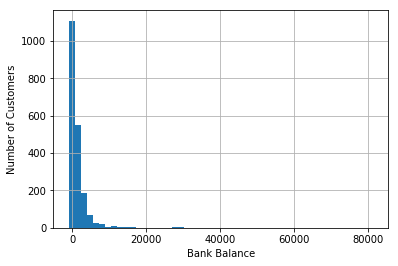

In [14]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

# Numberical 1 Plot - Balance
df['balance'].hist(bins=50)
plt.xlabel('Bank Balance')
plt.ylabel('Number of Customers')
plt.show()

Seems the plot goes out to 80000 but we have negligible number of customers in this range, may be outliers.
A Box plot may identify these better.

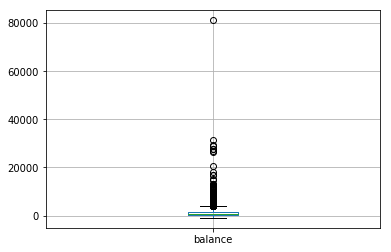

In [15]:
df.boxplot(column='balance')
plt.show()

Balance: Indeed there is a single outlier at 80,000 balance.
If I remove that outlier what will I get?


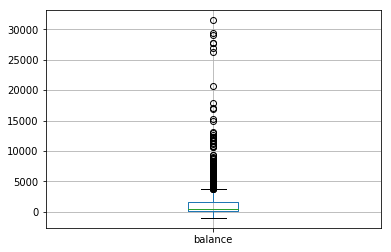

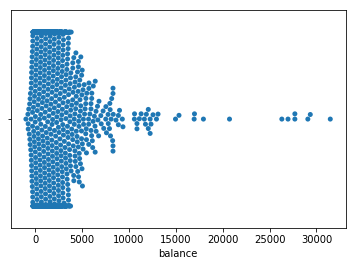

count     1999.000000
mean      1373.748374
std       2573.216453
min       -980.000000
25%        201.000000
50%        550.000000
75%       1642.000000
max      31472.000000
Name: balance, dtype: float64

In [16]:
df2 = df[df["balance"] < 60000]

df2.boxplot(column="balance")
plt.show()

sns.swarmplot(x=df2['balance'])
plt.show()

df2['balance'].describe()

# Usual boxplot
#sns.boxplot(x='balance', y='subscribed', data=df2)
 
# Add jitter with the swarmplot function.
#ax = sns.swarmplot(x='balance', y='subscribed', data=df, color="grey")
#ax.show()

Need to see a distribution to help understand volumes.

D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


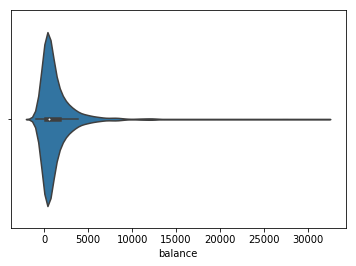

In [17]:
sns.violinplot(x=df2["balance"])

Now we can see the majority of the blances are under 3k

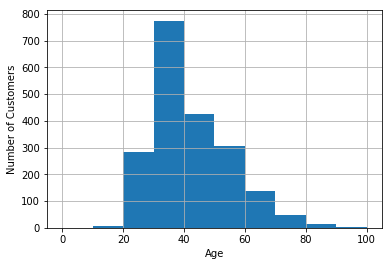

In [18]:
# Numerical 2 plot - Age
df['age'].hist(range=(0,100),bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

Age: Mostly over 20, under 80. Biggest group 30-40

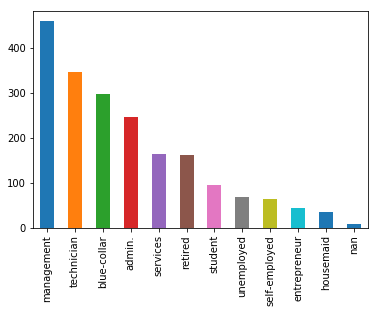

In [19]:
# Plot Category 1 - Job
df['job'].value_counts(dropna=False).plot(kind='bar')
plt.show()

Management is this most popular job, them technocan then blue-collar. I added "nan" which is blanks, there aare only a few blanks. We could remove these from our training for example.

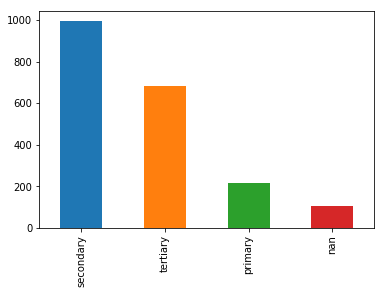

In [20]:
# Plot Category 2 - Education
df['education'].value_counts(dropna=False).plot(kind='bar')
plt.show()

I added "nan" which is blank entries, there are a few. We could remove these or focus on Secondary, Teiary and Other for example.
We have many with Secondary and Tetriary.

## 2.3 Generate two plots with the combined distribution of attributes and draw conclusions from them

D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


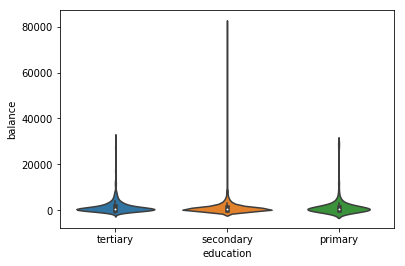

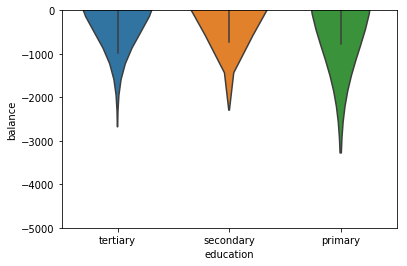

In [21]:
# Combined attributes 1 - Education & balance
sns.violinplot(x='education', y='balance', data=df, fit_reg=False) 
plt.show()
sns.violinplot(x='education', y='balance', data=df, fit_reg=False) 
plt.ylim(-5000, 0)
plt.show()

Primary has large number of negtive < 1000 balances. Tertiary is spread to 2000.
When I look at the actual values - I see only 10 values below -500 for all, and the lowest is -980, so I do not se the violin plot being accurate.

In [22]:
df[df['balance']<-500].describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,43.900000,-672.100000,0.606062,0.062588,15.40000,197.500000,2.100000,137.500000,0.900000
std,8.006248,140.350712,0.730185,0.990056,11.88089,121.169532,1.197219,121.969258,0.875595
min,33.000000,-980.000000,-0.484309,-1.660590,2.00000,52.000000,1.000000,-1.000000,0.000000
25%,39.000000,-741.750000,0.104316,-0.379823,8.00000,122.250000,1.250000,-1.000000,0.000000
50%,42.500000,-646.500000,0.659399,0.044637,8.00000,183.000000,2.000000,185.500000,1.000000
75%,47.500000,-563.000000,1.021992,0.984313,28.75000,215.000000,2.000000,247.750000,1.750000
max,57.000000,-528.000000,1.867728,1.125650,30.00000,484.000000,5.000000,260.000000,2.000000


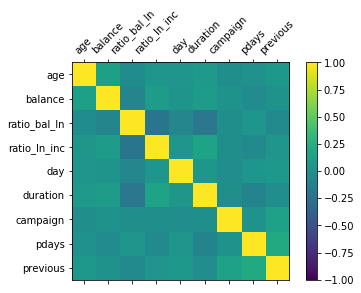

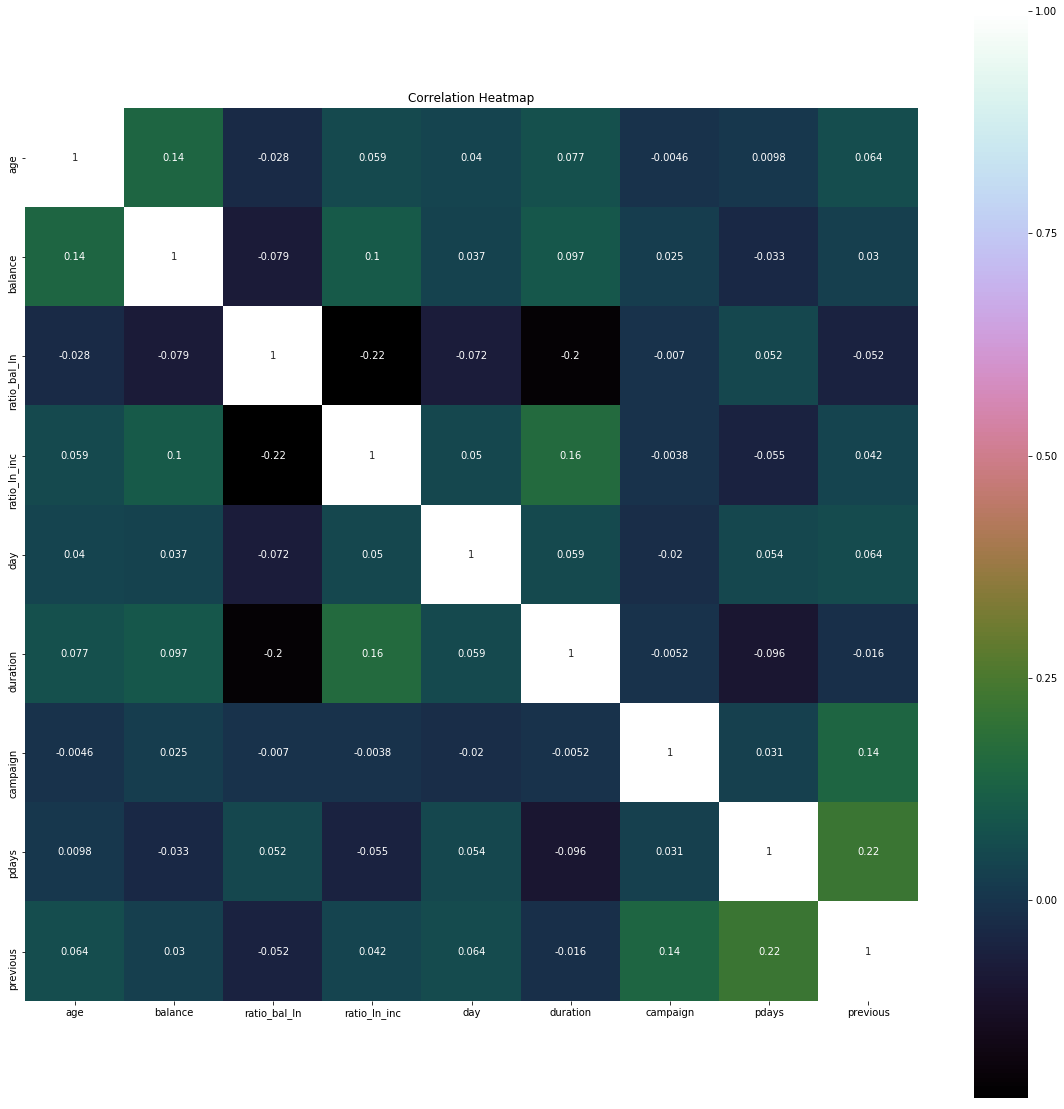

In [23]:
import numpy as np
names=["age","balance","ratio_bal_ln", "ratio_ln_inc", "day","duration","campaign","pdays","previous"]
df3 = df[names]
         
# Plot the correlation matrix for numerical values
correlations = df3.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45)
ax.set_yticklabels(names)
correlations.style.background_gradient().set_precision(2)
plt.show()
plt.figure(figsize=(20, 20))  
plt.title("Correlation Heatmap")
sns.heatmap(correlations, vmax=1, square=True, annot=True, cmap='cubehelix')

No very strong correlations. Which would indicate redundant features if we had high values (close to 1).

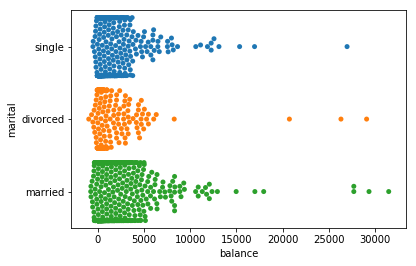

In [24]:
# Combined attributes 2 - Marital & balance
sns.swarmplot(x=df2['balance'], y=df["marital"])

In [25]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

Divorced seem to have less of a balance at the higer end (above 5000)

D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


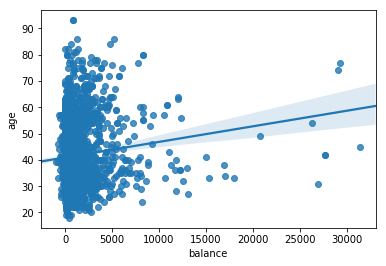

In [26]:
# Combined Attrbiutes Plot 3 -  Age V Balance
sns.regplot(y='age', x='balance', data=df2)

Pretty uniform above and bleow the age line. Not seeing a correlation. 

## 2.4 Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1


Text(0.5, 0.98, '')

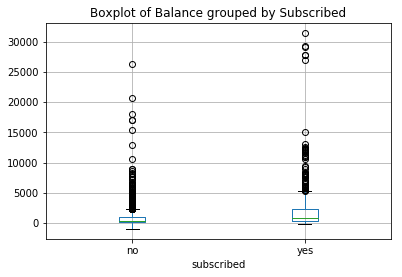

In [27]:
# Plot Predict 1 - Balance & Subscribed
# Boxplots of balance, grouped by the categorical attribute Education
df2.boxplot(column='balance', by='subscribed')
plt.title('Boxplot of Balance grouped by Subscribed')
plt.suptitle("") 

Clearly there is a relationship. I'd like a scatter plot or violin plot to show volumes better.

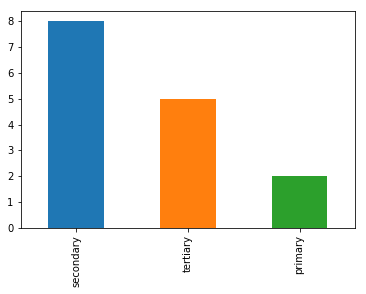

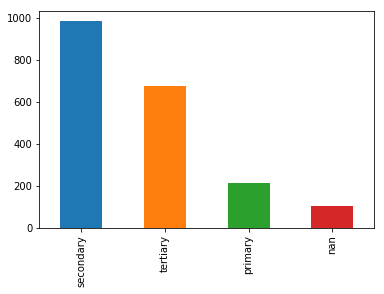

In [28]:
df_default_yes=df[df['default']=='yes']
df_default_no=df[df['default']=='no']

df_default_yes['education'].value_counts(dropna=False).plot(kind='bar')
plt.show()

df_default_no['education'].value_counts(dropna=False).plot(kind='bar')
plt.show()



D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


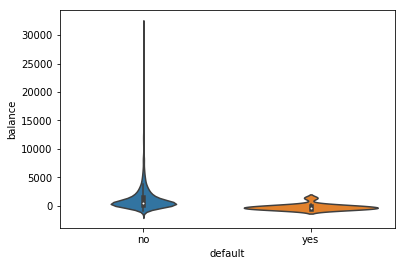

In [29]:
sns.violinplot(x='default', y='balance', data=df2) 
plt.show()

In [30]:
df['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

Balance seems to be a clear indicator of default. We only have 15 defaults, so it is a very low population, but all balances are low for these.


After changing y target to __'subscribed'__ I will redo these comparisons to 'subscribed' instead

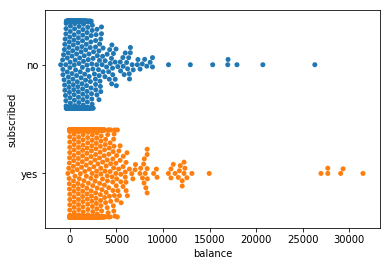

In [31]:
sns.swarmplot(x=df2['balance'], y=df2["subscribed"])
plt.show()

D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


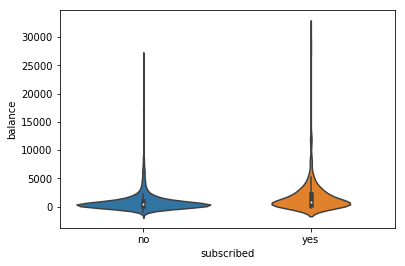

In [32]:
sns.violinplot(x='subscribed', y='balance', data=df2) 
plt.show()

Higher balances seem to subscribe more. 

D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


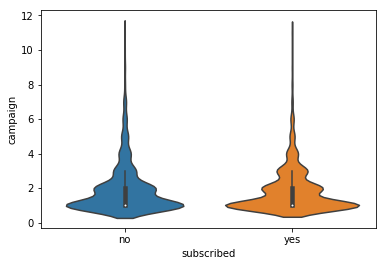

In [33]:
sns.violinplot(x='subscribed', y='campaign', data=df2) 
plt.show()

Checking campaign numbers does not seem to be as correlated.

D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


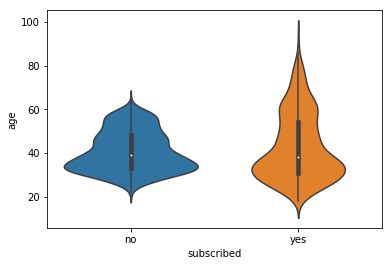

In [34]:
sns.violinplot(x='subscribed', y='age', data=df2) 
plt.show()

We see older people subscribing more than younger people.

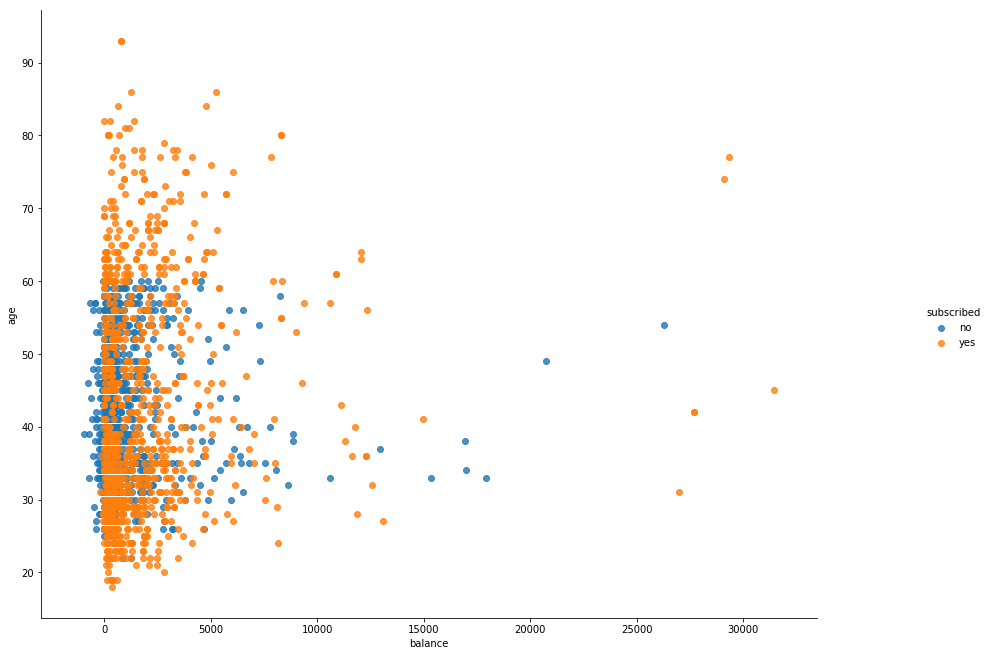

In [35]:
sns.lmplot('balance', 'age', df2, hue='subscribed', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

Everyone over 60 seems to have subscribed.
Almost everyone under 24 or so subscribed.

Everyone with a balance over 25k has subscribed bar 1, only 6 balances, so poor data for balances over 25k.

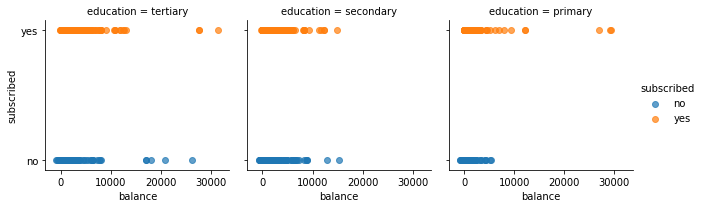

In [36]:
g = sns.FacetGrid(df2, col="education", hue="subscribed")
g.map(plt.scatter, "balance", "subscribed", alpha=.7)
g.add_legend();

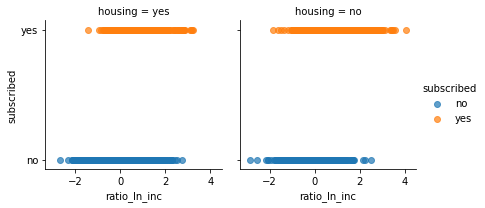

In [37]:
g = sns.FacetGrid(df2, col="housing", hue="subscribed")
g.map(plt.scatter, "ratio_ln_inc", "subscribed", alpha=.7)
g.add_legend();

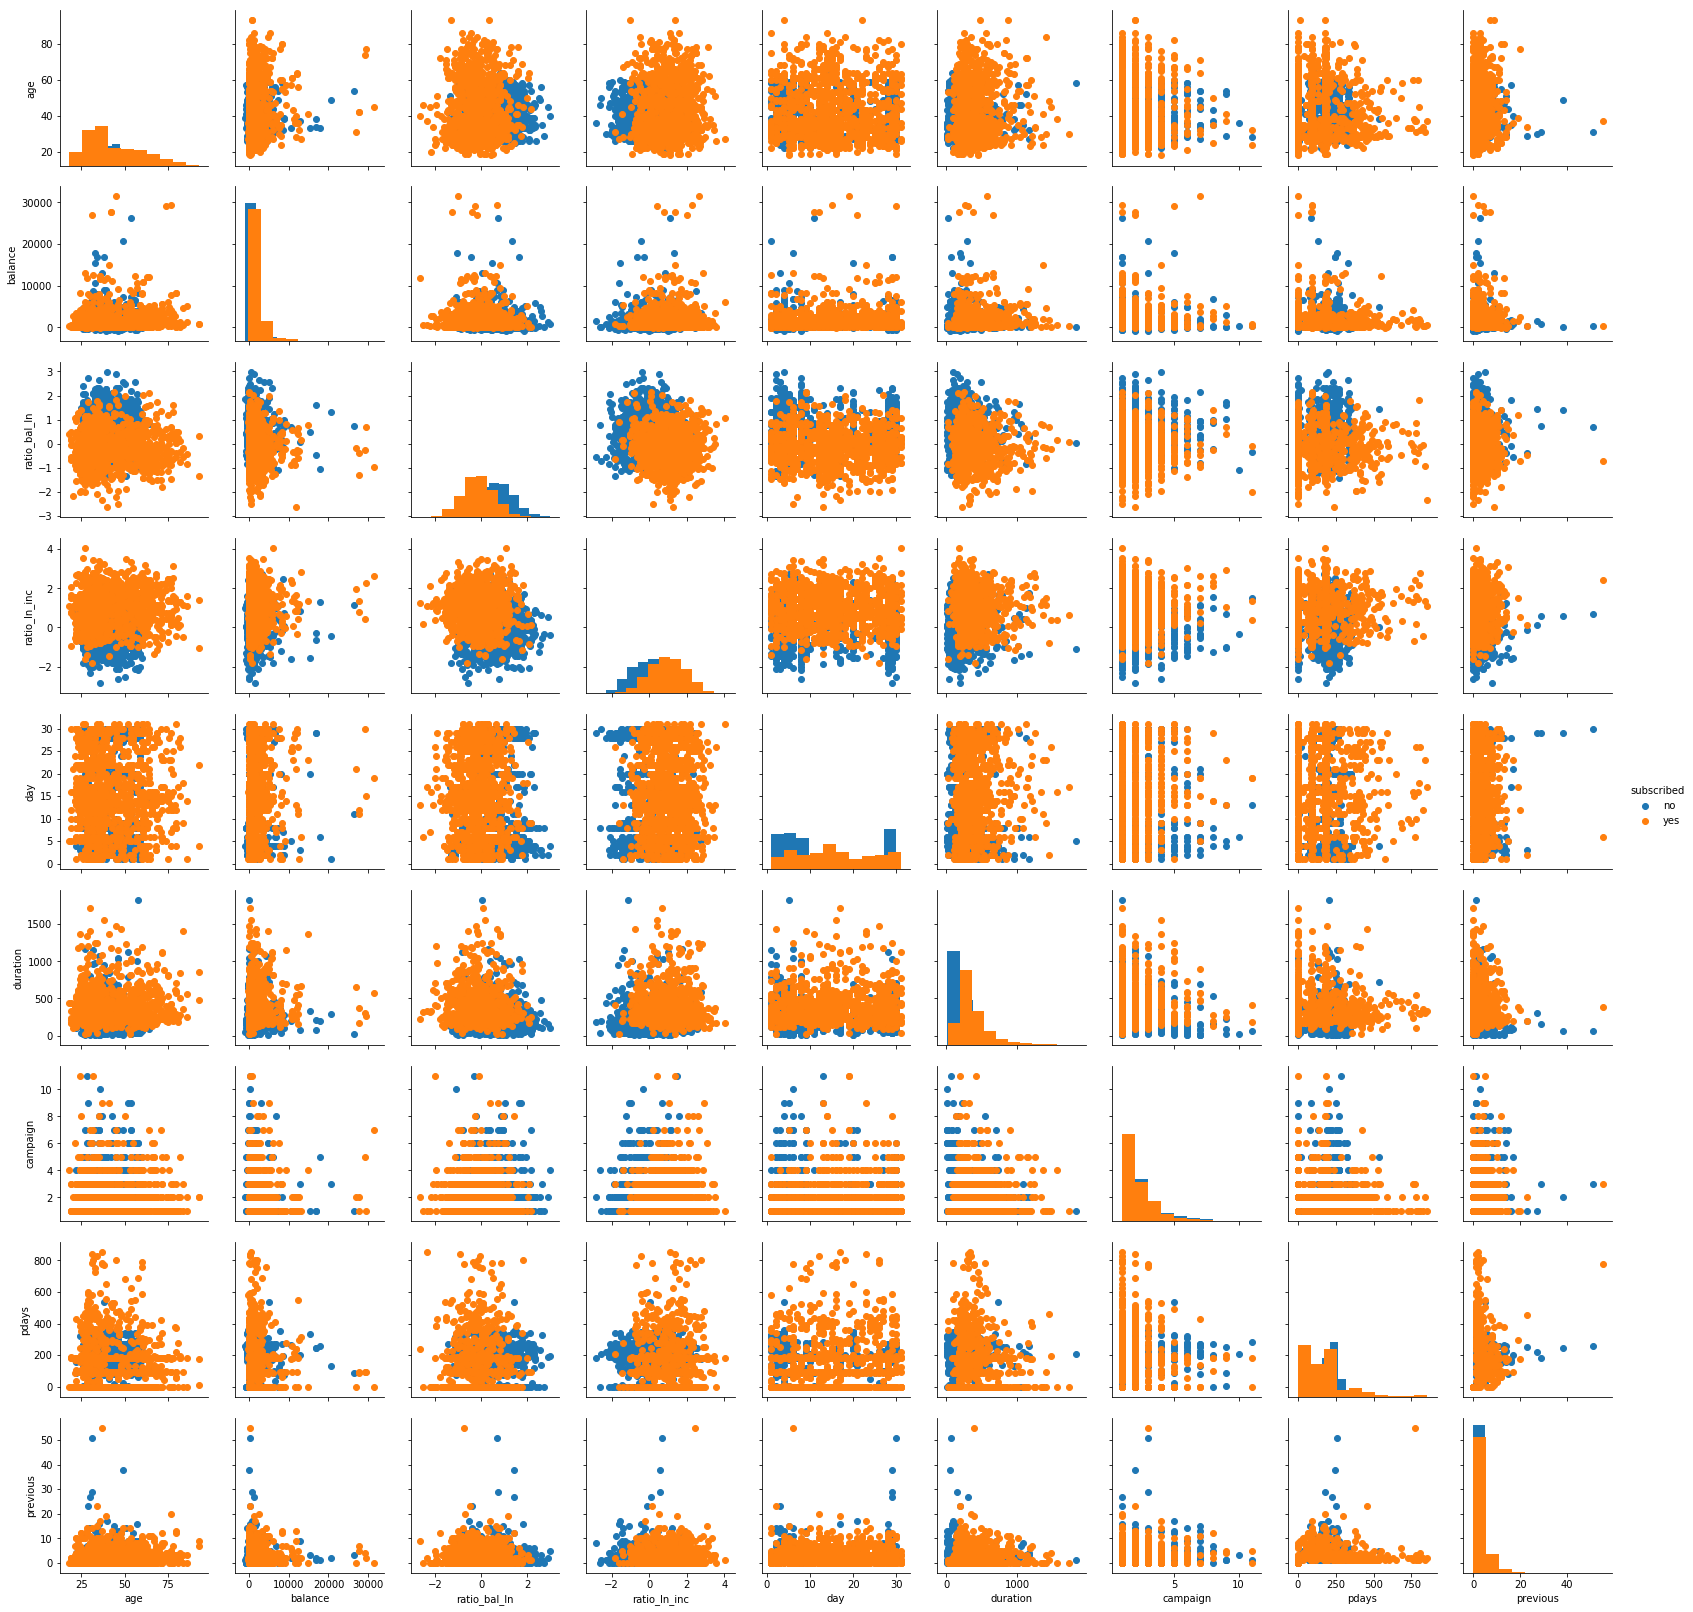

In [38]:
g = sns.PairGrid(df2, hue="subscribed")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

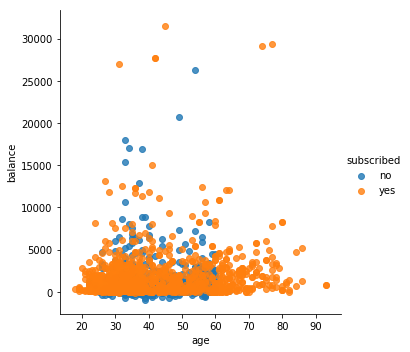

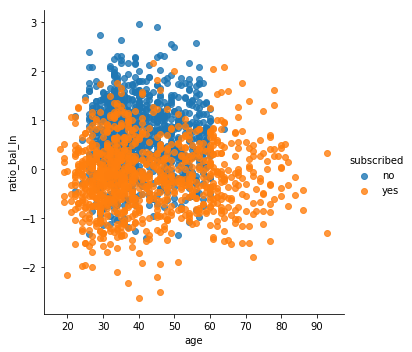

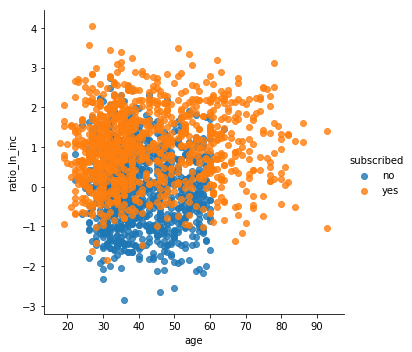

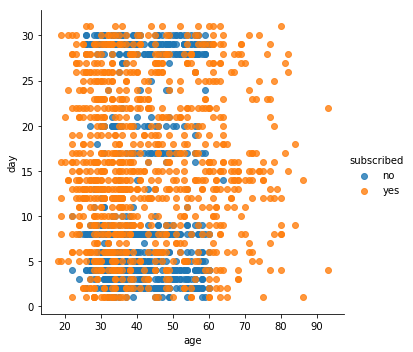

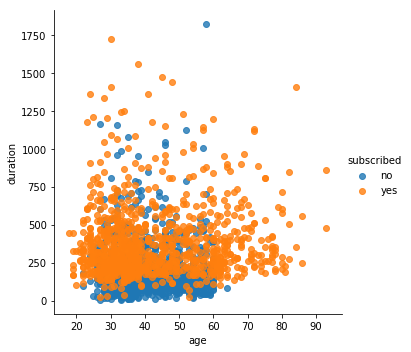

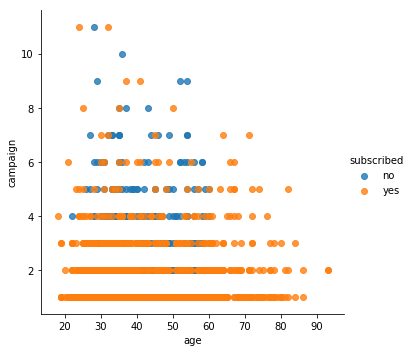

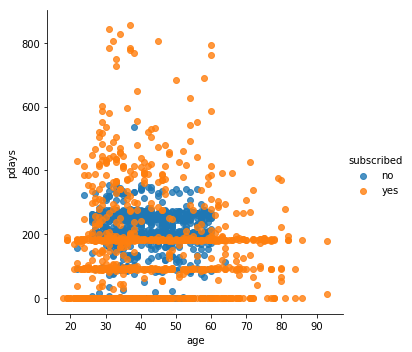

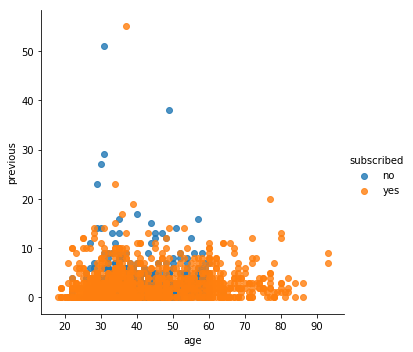

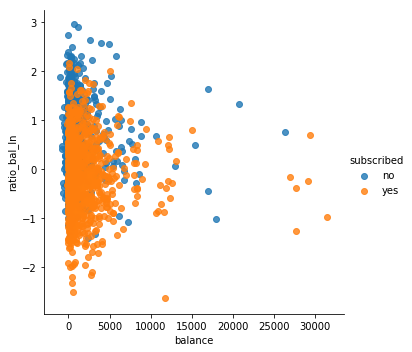

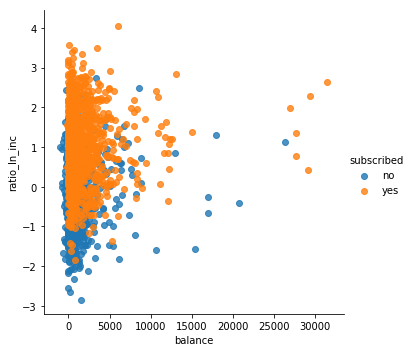

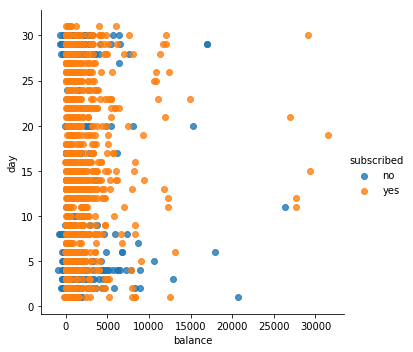

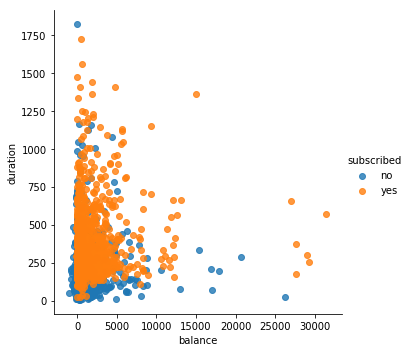

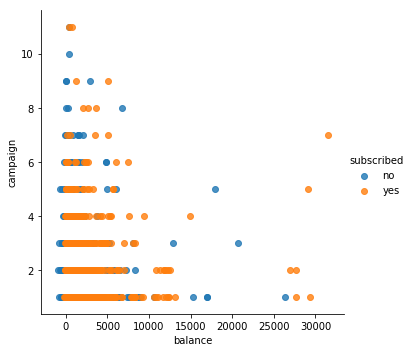

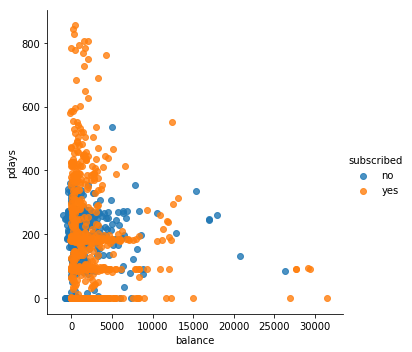

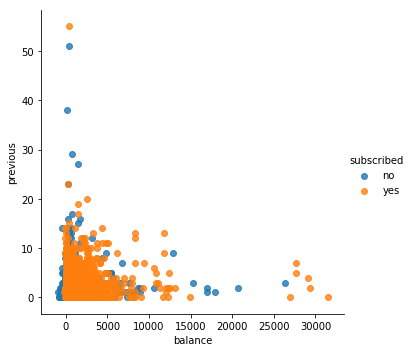

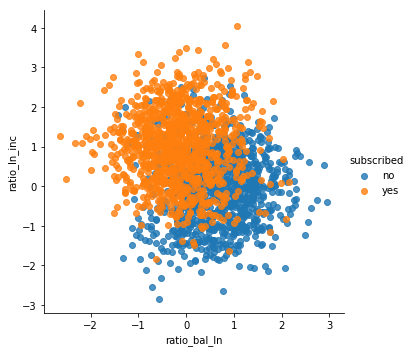

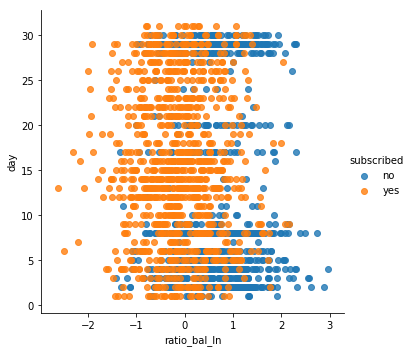

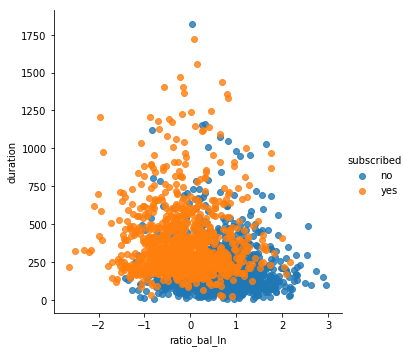

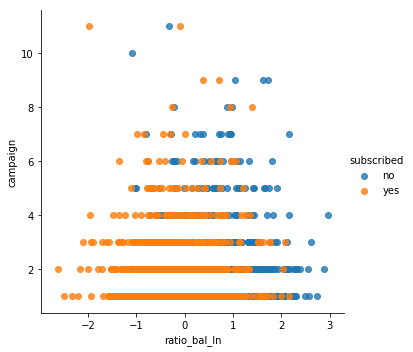

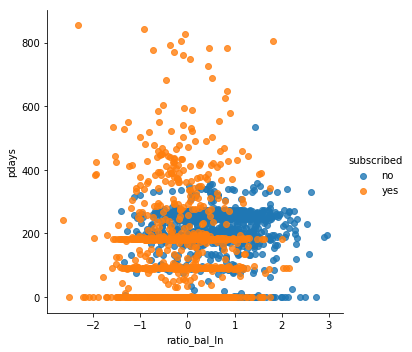

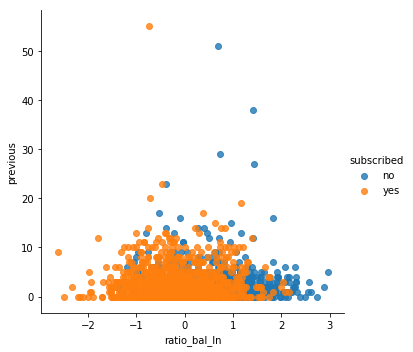

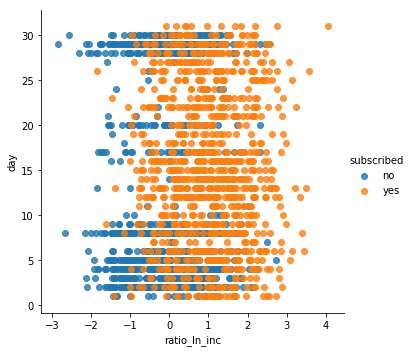

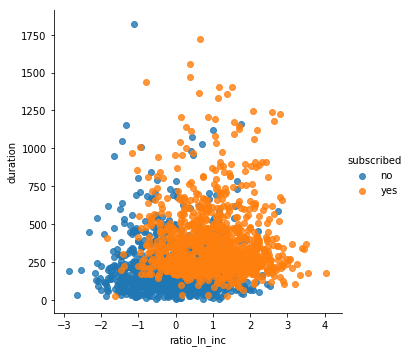

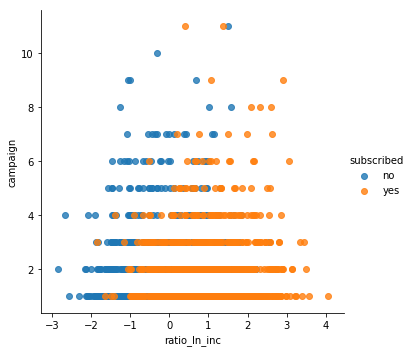

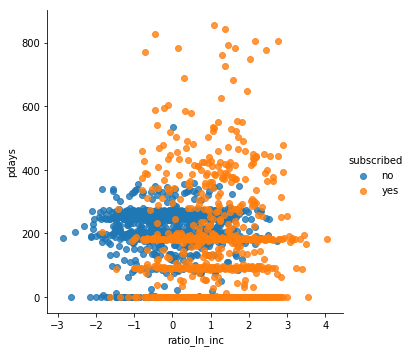

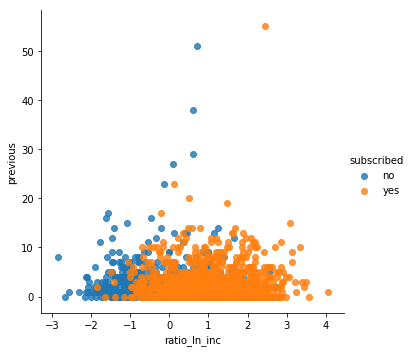

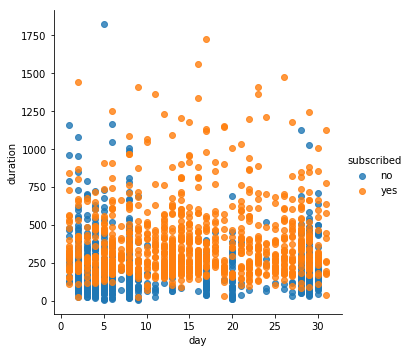

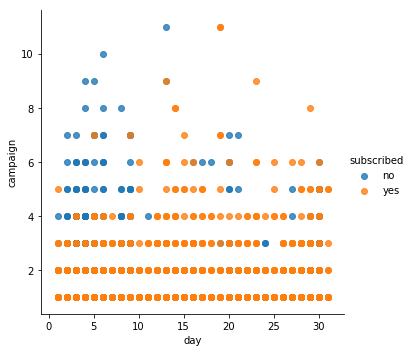

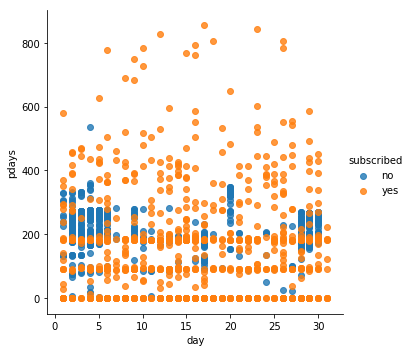

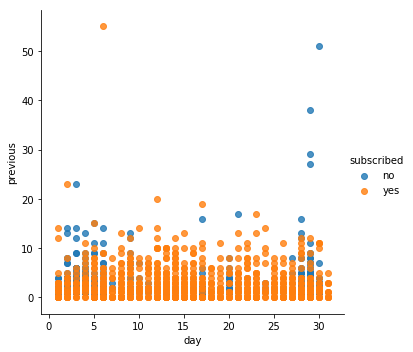

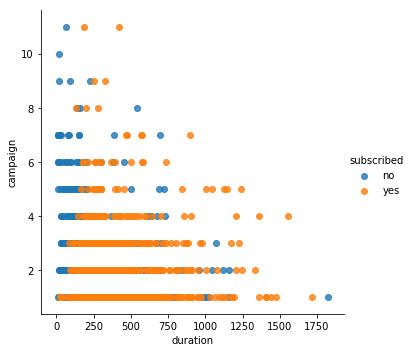

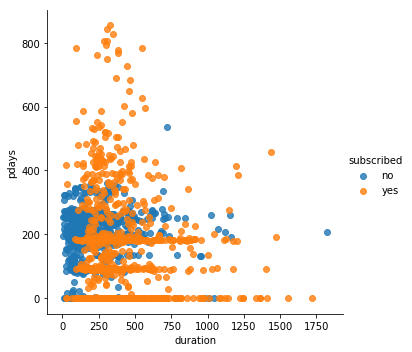

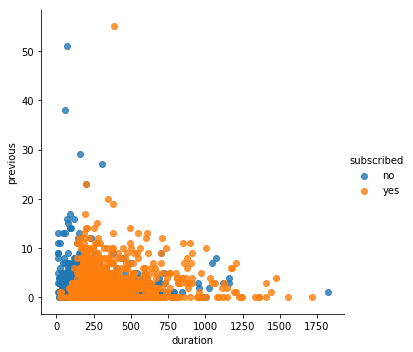

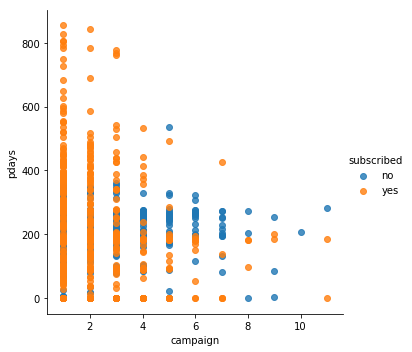

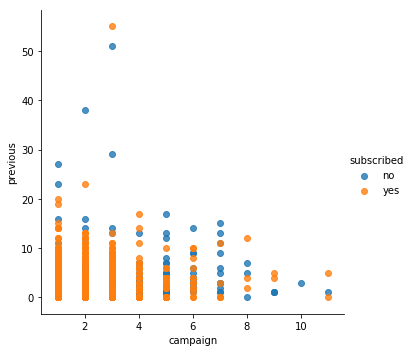

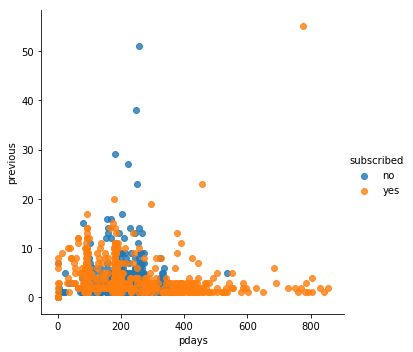

In [39]:
# all numerical values in names[]
graphs = []
i = 0
for x in names:
    for y in names: 
        if(x!=y):
            this_graph = x+y
            this_graph2 = y+x
            if this_graph in graphs:
                continue
            elif this_graph2 in graphs:
                continue
            else:
                i += 1
                graphs.append(this_graph)
                sns.lmplot(x, y, df2, hue='subscribed', fit_reg=False)
                #fig = plt.gcf()
                #fig.set_size_inches(15, 10)
                plt.show()
                

#### Review Pair Pots
A scatter plot for the values, can visually show us if there is any clear separation of clusters for subscribed and unsubsrcibed for our numerical values.
There is not much separation, but the most separation is with ratio_ln_inc, ratio_bal_ln & age,
Let's zoom in.

D:\Python\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


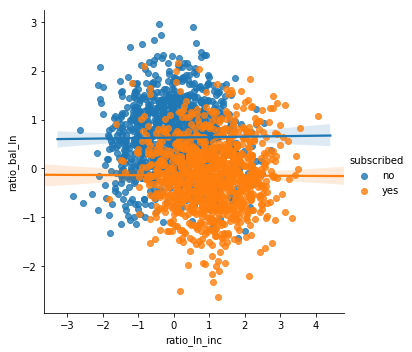

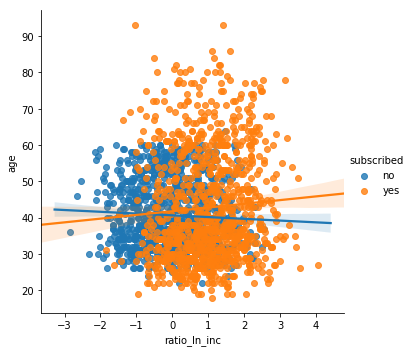

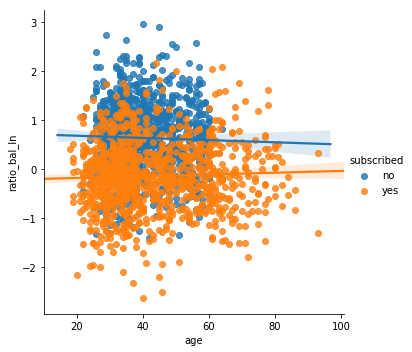

In [40]:
sns.lmplot('ratio_ln_inc', 'ratio_bal_ln', df2, hue='subscribed')
sns.lmplot('ratio_ln_inc', 'age', df2, hue='subscribed')
sns.lmplot('age', 'ratio_bal_ln', df2, hue='subscribed')


plt.show()


From all the plots of the numerical data. 

__ratio_bal_ln__ v __age__          has large but overlapping clusters

__age__          v __ratio_ln_inc__ has large but overlapping clusters

__ratio_bal_ln__ v __ratio_ln_inc__ has large but overlapping clusters

The rest are too much overlapped, so one of these three options would seem best.

### Best Pick
The largest separation from the zoomed in graphs is __ratio_bal_ln__ & __ratio_ln_inc__

To be sure I will do a Correlation Matrix with __"subscribed"__ in the matrix - but first I will need to convert to a numeric.

__NOTE:__ I later found out that the values to se subcribed to (to match the PLA function to be used later) should be 1 and -1 (not 0 and 1)

In [41]:
#df2['subscribed'].value_counts()

df2['subscribed'].replace(to_replace=['no', 'yes'], value=[-1, 1],inplace=True)
df2.head(5)

D:\Python\Miniconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,-1
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,-1
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,-1
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,-1
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,-1


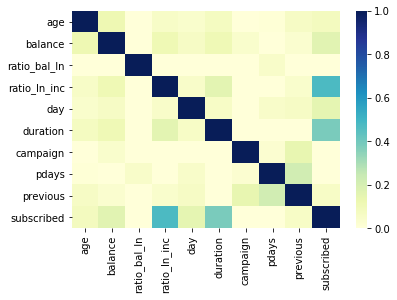

In [42]:
correlation = df2.corr()

#heatmap
sns.heatmap(correlation, vmin=0, vmax=1, cmap="YlGnBu")
plt.show()

Looking at this correlation  matrix which includes __subscribed__ the only 2 dark items (higher correlation) are __ration_ln_inc__ and __duration__

I had done the below tasks for __ratio_bal_ln__ & __ratio_ln_inc__ so I wil redo for __ration_ln_inc__ and __duration__ as well

## Task 3

Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:
* Input space
* Output space
* Unknown target function
* Data set
* Hypothesis set
* Final Hypothesis
* In-sample error
* Out-of-sample error


## Task 3 Answer:


The Perceptron can take in our 2 chosen numerical values __ratio_bal_ln & ratio_ln_inc__ to help us predict our chosen target feature - __'subscribed'__.


For machine learning we presume there is a hidden pattern in the data which will help us with our prediction. We assume there is no mathematical solution and we have data on our chosen domain. 

In this case the data is the 2000 records of bank customers.


#### Input space


The Input space for our unknown target function f(x) is the bank records we have available. We have reduced the data we wish to learn from to be ratio_bal_ln & ratio_ln_inc numerical values for each customer.


#### Output Space
This will be the feature 'subscribed' the feature we want to predict for our bank customers, which is either 'yes' or 'no'.


#### The Unknown Target Formula
Assuming there is a pattern, we say there is a target function f(x) that will accurately predict the correct output.

We assume there is an target function f(x) which will be able to predict the correct output - 'subscribed' if we give it the input for that customer (ratio_bal_ln & ratio_ln_inc).

We have data 1000 each for subscribed 'yes' and 'no' to help us identify this function.

#### Data Set
The Data Set contains these 2000 bank customer records.

#### Hypothesis Set
To attempt to identify the target function f(x) we are providing some various candidate functions h(x) which we hope could accurately match the pattern in the data and be equivalent to the unknown target function f(x) to allow us to accurately predict the correct output. 

We may specify many possible functions, all hypothesis functions to test with - h1(x), h2(x),... hn(x)

We run the data through these Hypothesis functions to see how accurate they are. We test against the known data to see which hypothesis function is the most accurate and has the smallest error - __In-Sample Error__. 

This function would be our chosen __Final Hypothesis function g(x)__.

The expectation is that this function would be as close as possible to the target function f(x) to with in a tolerable difference when using brand new data, which the function has not been trained or checked against, this is new data which is outside of the samples seen previously and the error of the __final hypothesis function g(x)__ on this new data would be __out-of-sample Error__ should be very low - within a specified tolerance of f(x). 

f(x), the ideal function, would have zero error.

## Task 4

### 4.1 Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. 

Suggestion: try PLA on this dataset before using the bank dataset

In [43]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 
print(X[4])
print(y[4])

[-3.13210191 -3.88299845]
-1


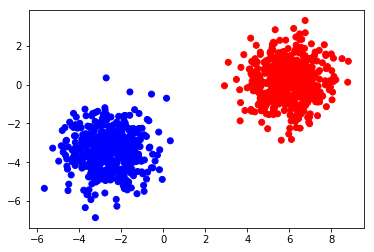

In [44]:
colors = ['red' if yy == 1 else 'blue' for yy in y] 
plt.scatter(X[:,0],X[:,1], color=colors)
plt.show()

Looks linearly separable - so PLA should work!

In [45]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [46]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [47]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [48]:
def pla(training_in, training_out, weights, max_iterations=5):
    bias = np.array([1])
    iterations=0
    while iterations < max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                #print("h(x): {} compared to y: {}".format(h(x,weights), y))
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
                #print("New iteration: {}/{} errors: {}".format(iterations,max_iterations, errors))
        if (errors == 0):
            break
    return weights, iterations

In [49]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

In [50]:
# Using the pla algoritm I pass in the Input X and out put y plus weights I need 2 + a bias
weights = np.array([1,1,1])

final_weights, total_iterations = pla(X, y, weights, 100)

print("The PLA algorithim found the boundary with the weghts: {} after {} iterations".format(final_weights, total_iterations))

The PLA algorithim found the boundary with the weghts: [0.         4.56266109 4.71477352] after 3 iterations


### Task 4.2  Take note of the number of iterations that were required to come to the final hypothesis and the final error.¶
Once you are satisfied you understand these results, 

Result was 54 iterations.
PLA weights with zero error is [-21.        ,   4.14235043, -21.36906252]

I see we can use decision boundary to calculate the boundary line, but I need X min & X max and pass in the final weights


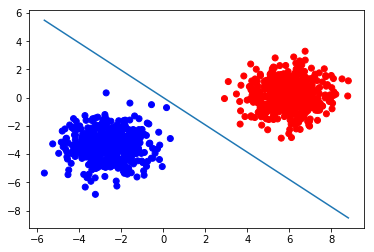

In [51]:
x_min = min(X[:,0])
x_max = max(X[:,0])

a,b = decision_boundary(final_weights, x_min, x_max)

plt.scatter(X[:,0],X[:,1], color=colors)
plt.plot([x_min, x_max], [a, b])
plt.show()

In [52]:
print (a,b)

5.488795106745712 -8.519057431988811


### 4.3 Run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). 

If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. 

In [53]:
# sing the selected inputs ratio_bal_ln & ratio_ln_inc
X2 = df2[['ratio_bal_ln', 'ratio_ln_inc']].values
y2 = df2['subscribed'].values

from sklearn.model_selection import train_test_split


# before I run the PLA algoritm, I want to ensure I have a max number of iterations, 
# so I will edit the pla() method to ensure this

In [54]:
# Using the pla algoritm I pass in the Input X and out put y plus weights I need 2 + a bias
weights2 = np.array([2,2,2])

final_weights2, total_iterations2 = pla(X2, y2, weights2, 100000)

print("The PLA algorithim completed with the weights: {} after {} iterations".format(final_weights2, total_iterations2))


The PLA algorithim completed with the weights: [ 2.         -0.16193194  1.0182789 ] after 100000 iterations


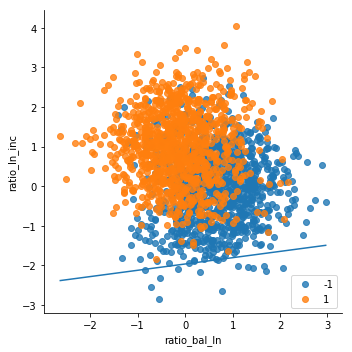

In [55]:
x_min2 = min(X2[:,0])
x_max2 = max(X2[:,0])

a2,b2 = decision_boundary(final_weights2, x_min2, x_max2)

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="ratio_bal_ln", y="ratio_ln_inc", data=df2, fit_reg=False, hue='subscribed', legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.plot([x_min2, x_max2], [a2, b2])
plt.show()

Not a grest result - we are not going to have a linear separatio, therefore the method will stop without knowing if it is the best set of weights.

#### Review Results
Optimizations - I already limited the PLA to 100 iterations, which took a long time!
Now I want to update to make it like a pocket algorithm so we keep the lowest error, as we do not expect a clear boundary and therefore we cannot expect a zero error, so when we exit we should have saved the best weight experienced so far..

In [56]:
def pocket_pla(training_in, training_out, weights, max_iterations=5):
    best_weights = weights
    best_error = calc_error(training_in, training_out, weights)
    print("Initial Weights: {} Initial Error: {:10.4f} Target Iterations: {}".format(best_weights, best_error,max_iterations))
    bias = np.array([1])
    iterations=0
    while iterations < max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                # Before we change the weights - I will see if I should save the old weights
                these_weights_error = calc_error(training_in, training_out, weights)
                if(these_weights_error<best_error):
                    print("FOUND BETTER WEIGHTS {}/{} {:10.4f}/{:10.4f}".format(best_weights, weights, best_error, these_weights_error))
                    best_weights = weights
                    best_error = these_weights_error
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        #print("Iteration: {}/{}".format(iterations,max_iterations))
        #print("Current Weights: {} Best Weights: {} Errors: {} Best Error:{}".format(weights,best_weights, these_weights_error, best_error))    
        if (errors == 0):
            break
    return best_weights, iterations, best_error
               

In [57]:
# Using the POCKRT pla algoritm I pass in the Input X and out put y plus weights I need 2 + a bias
weights2 = np.array([1, 1,  1])

# Records:
# started: [-0.43506681, -2.59602935,  2.50920978] 5000 Best: 3.56493319 0.36555952 0.99798752 Error: 0.5003
# started: [1, 1,  1] 5000 Best: [ 4.         -0.18002155  0.65164815] Error: 0.5003
# started: [1,1,1] 50,000 Best: [ 4.         -0.18002155  0.65164815] [ 4.         -0.18002155  0.65164815]

# The above results were in error as I had set the target to 0 and 1 for 'subscribed'. When it should have been 1 and -1

#(Fixed Target from 0,1 to 1,-1)
# started [1,1,1]  50,000 Best: [-1.         -1.37258458  1.81487784] Error: 0.2316
# started [1,1,1]   5,000 Best: [-1.         -1.43197411  1.78589601] Error: 0.2321

final_weights2, total_iterations2, final_error = pocket_pla(X2, y2, weights2, 5000) 

print("The Pocket PLA algorithim completed with the weights: {} after {} iterations with an Error of: {:10.4f}".format(
    final_weights2, total_iterations2, final_error))


Initial Weights: [1 1 1] Initial Error:     0.4752 Target Iterations: 5000
FOUND BETTER WEIGHTS [1 1 1]/[ 0.         -0.30013442  0.52610488]     0.4752/    0.2431
FOUND BETTER WEIGHTS [ 0.         -0.30013442  0.52610488]/[ 1.         -2.73813666  1.41600797]     0.2431/    0.2406
FOUND BETTER WEIGHTS [ 1.         -2.73813666  1.41600797]/[-1.         -1.36973051  1.80499954]     0.2406/    0.2331
FOUND BETTER WEIGHTS [-1.         -1.36973051  1.80499954]/[-1.         -1.43197411  1.78589601]     0.2331/    0.2321
The Pocket PLA algorithim completed with the weights: [-1.         -1.43197411  1.78589601] after 5013 iterations with an Error of:     0.2321


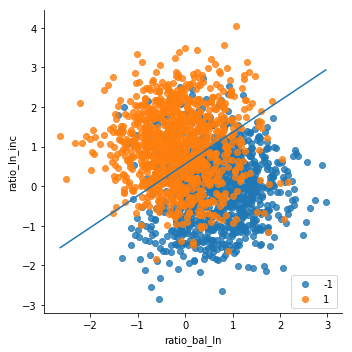

In [58]:
x_min2 = min(X2[:,0])
x_max2 = max(X2[:,0])

a2,b2 = decision_boundary(final_weights2, x_min2, x_max2)

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="ratio_bal_ln", y="ratio_ln_inc", data=df2, fit_reg=False, hue='subscribed', legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.plot([x_min2, x_max2], [a2, b2])
plt.show()

### 4.4 Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. 

Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. 

### 4.5 In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). 



In [59]:
def pocket_pla_errors(training_in, training_out, test_in, test_out, weights, max_iterations=10):
    ein = []
    eout = []
    print("Initial Weights: {} Target Iterations: {}".format(weights, max_iterations))

    bias = np.array([1])
    iterations=0
    while iterations < max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                # Before we change the weights - I will record he ein and eout for this Hypothesis
                this_ein  = calc_error(training_in, training_out, weights)
                this_eout = calc_error(test_in, test_out, weights)
                ein.append(this_ein)
                eout.append(this_eout)
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        #print("Iteration: {}/{} ein:{} eout:{}".format(iterations,max_iterations, this_ein, this_eout))
        #print("Current Weights: {}".format(weights))    
        if (errors == 0):
            break
    return ein, eout, iterations
               

In [60]:
# Split the data in to train and test (80/20 split) nsure the data is shuffled.
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, shuffle=True)

In [61]:
ein, eout, actual_iterations = pocket_pla_errors(X_train, y_train, X_test, y_test, weights2, 5000)
ein2, eout2, actual_iterations2 = pocket_pla_errors(X_train, y_train, X_test, y_test, weights2, 50000)
ein3, eout3, actual_iterations3 = pocket_pla_errors(X_train, y_train, X_test, y_test, weights2, 100000)

Initial Weights: [1 1 1] Target Iterations: 5000
Initial Weights: [1 1 1] Target Iterations: 50000
Initial Weights: [1 1 1] Target Iterations: 100000


In [62]:
print(len(ein))
print(len(ein2))
print(len(ein3))

print(actual_iterations)
print(actual_iterations2)
print(actual_iterations3)

5238
50226
100018
5238
50226
100018


In [63]:
prob_epsilon=[]
prob_epsilon2=[]
prob_epsilon3=[]

N=len(X_train)

epsilons = np.arange(0, 1, 0.01)
for e in epsilons:
    prob_epsilon.append(len([1 for i in range(actual_iterations) if abs(ein[i]-eout[i]) > e])/actual_iterations)
    prob_epsilon2.append(len([1 for i in range(actual_iterations) if abs(ein2[i]-eout2[i]) > e])/actual_iterations2)
    prob_epsilon3.append(len([1 for i in range(actual_iterations) if abs(ein3[i]-eout3[i]) > e])/actual_iterations3)
    


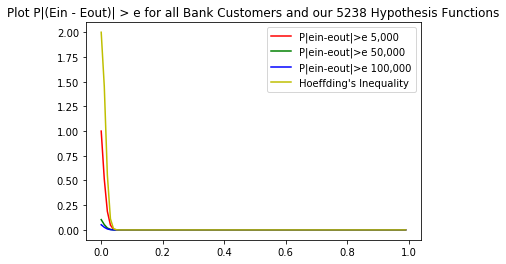

In [64]:
plt.figure()
plt.plot(epsilons, prob_epsilon, 'r', label="P|ein-eout|>e 5,000")
plt.plot(epsilons, prob_epsilon2, 'g', label="P|ein-eout|>e 50,000")
plt.plot(epsilons, prob_epsilon3, 'B', label="P|ein-eout|>e 100,000")
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons], 'y', label="Hoeffding's Inequality")
plt.legend()
plt.title("Plot P|(Ein - Eout)| > e for all Bank Customers and our {} Hypothesis Functions".format(actual_iterations))
plt.show()

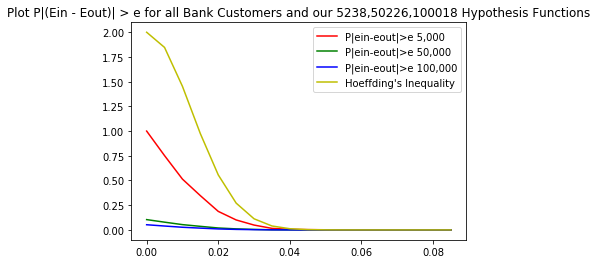

In [65]:
# Let's zoom in
prob_epsilon=[]
prob_epsilon2=[]
prob_epsilon3=[]

N=len(X_train)

epsilons = np.arange(0,0.09, 0.005)
for e in epsilons:
    prob_epsilon.append(len([1 for i in range(actual_iterations) if abs(ein[i]-eout[i]) > e])/actual_iterations)
    prob_epsilon2.append(len([1 for i in range(actual_iterations) if abs(ein2[i]-eout2[i]) > e])/actual_iterations2)
    prob_epsilon3.append(len([1 for i in range(actual_iterations) if abs(ein3[i]-eout3[i]) > e])/actual_iterations3)

plt.figure()
plt.plot(epsilons, prob_epsilon, 'r', label="P|ein-eout|>e 5,000")
plt.plot(epsilons, prob_epsilon2, 'g', label="P|ein-eout|>e 50,000")
plt.plot(epsilons, prob_epsilon3, 'b', label="P|ein-eout|>e 100,000")

plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons], 'y', label="Hoeffding's Inequality")
plt.title("Plot P|(Ein - Eout)| > e for all Bank Customers and our {},{},{} Hypothesis Functions".format(actual_iterations,actual_iterations2, actual_iterations3))
plt.legend()
plt.show()

### 4.6 Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).

We can see that for all my experiements of Hypothises functions, that our experiments hold for the Hoeffding Inequality. 
Our Ein sampe error closely follows our Eout of samle error to a very tight margin and does not exceed Hoeffdeing's Inequality measure.

So reardless of the Hypothesis Function used, the E out of sample error tracks very closely with the E in sample error, meaning we can use our In samel measurements as something that will match future out of sample behaviour and therefore we can learn with samples and have onfidence it wil probably match future behaviour quite closely.

I increased fro 5,000 iterations to 50,000 & 100,000 and got much better results in terms of Ein following eout. 
This indicates that with more samples we can reduce the difference between Ein and Eout and have even more confidence in our model to a small level of eror (epsilon).